# Election Insights: Uncovering Voter Trends  

### Description  
It's election season, and the Democratic National Committee (**DNC**) and the Republican National Committee (**RNC**) need your help analyzing voter demographics and donation data to inform campaign strategies.

### Tasks
- Merge the voter demographics and donation dataframes on the voter ID column and calculate the total donations received from each state.
- Transform the 'donation_date' column to datetime format and extract the month and year of each donation. Then, create a new dataframe showing the total donations received each month, grouped by state.
- Pivot the merged dataframe to show the average donation amount by age group and state.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# The Data  

The dataset consists of two CSV files: "voter_demographics" and "donations", containing information on 100,000 voters (age, state, party affiliation) and 50,000 donations (date, amount) made by these voters, respectively. The data is synthetic, representing a fictional scenario, and is designed to mimic real-world voter demographics and donation patterns.

### Columns:
**Voter Demographics:**  
- **voter_id:** Unique identifier for each voter.
- **state:** Two-letter abbreviation for the voter's state.
- **age:** Voter's age.
- **party_affiliation:** Voter's party affiliation.


**Donations:**  
- **voter_id:** Unique identifier for each voter.
- **donation_date:** Date of donation.
- **donation_amount:** Amount donated.

In [2]:
# set the seed
np.random.seed(0)

# voter demographics data
voter_demographics = pd.DataFrame({
    'voter_id': range(100000),
    'state': np.random.choice(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA'], size=100000),
    'age': np.random.randint(18, 80, size=100000),
    'party_affiliation': np.random.choice(['Democrat', 'Republican', 'Independent'], size=100000)
})

# donation data
donations = pd.DataFrame({
    'voter_id': np.random.choice(range(100000), size=50000),
    'donation_date': pd.date_range('2022-01-01', '2024-11-04', periods=50000),
    'donation_amount': np.random.randint(10, 1000, size=50000)
})

# save dataframes to CSV files
voter_demographics.to_csv('voter_demographics.csv', index=False)
donations.to_csv('donations.csv', index=False)

We will begin by reading the CSV files into memory.

In [3]:
# create dataframes
voter_demographics_df = pd.read_csv('voter_demographics.csv')
donations_df = pd.read_csv('donations.csv')

Let us take a look at the data types.

In [4]:
voter_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   voter_id           100000 non-null  int64 
 1   state              100000 non-null  object
 2   age                100000 non-null  int64 
 3   party_affiliation  100000 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


Take note that the column named "donation_date" will need to be converted into a date object since it is currently being treated as a string. (see task #2)

In [5]:
donations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   voter_id         50000 non-null  int64 
 1   donation_date    50000 non-null  object
 2   donation_amount  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


# Task #1  

Merge the voter demographics and donation dataframes on the voter ID column and calculate the total donations received from each state.

**Note:** By default, when using the `.merge` method, we are performing an inner join. This means we will not include any row where the "voter_id" column does not match between the two dataframes.

In [6]:
# merge the two dataframes
df = voter_demographics_df.merge(donations_df, on='voter_id')
df.head()

,voter_id,state,age,party_affiliation,donation_date,donation_amount
0,0,CO,64,Independent,2023-12-28 02:17:33.093061864,317
1,2,AR,49,Independent,2022-01-18 04:33:03.495669913,857
2,3,AR,47,Democrat,2022-04-25 06:51:57.806356128,296
3,5,GA,64,Independent,2023-11-25 08:03:14.691893840,100
4,6,AR,73,Independent,2022-06-10 13:57:48.525370508,119


We will make use of the `.groupby` method to calculate the total donations received from each state.

Looking at the final results, we can see that California gave the most donations and Arizona gave the least.

In [7]:
# create group object
group = df.groupby('state')

# total donations for the group
group['donation_amount'].sum().sort_values(ascending=False)

state
CA    2598324
AK    2582826
AR    2562748
CT    2522359
DE    2521311
FL    2520236
AL    2490510
CO    2477765
GA    2467164
AZ    2464678
Name: donation_amount, dtype: int64

# Task #2  

Transform the 'donation_date' column to datetime format and extract the month and year of each donation. Then, create a new dataframe showing the total donations received each month, grouped by state.

In [8]:
# convert to date object
df['donation_date'] = pd.to_datetime(df['donation_date'])

# check to make sure it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   voter_id           50000 non-null  int64         
 1   state              50000 non-null  object        
 2   age                50000 non-null  int64         
 3   party_affiliation  50000 non-null  object        
 4   donation_date      50000 non-null  datetime64[ns]
 5   donation_amount    50000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.3+ MB


In [9]:
# create a new dataframe
df_new = df.loc[:,['state','donation_date','donation_amount']]

# create new month and year columns
df_new['donation_month'] = df_new['donation_date'].dt.month
df_new['donation_year'] = df_new['donation_date'].dt.year

df_new.head()

,state,donation_date,donation_amount,donation_month,donation_year
0,CO,2023-12-28 02:17:33.093061864,317,12,2023
1,AR,2022-01-18 04:33:03.495669913,857,1,2022
2,AR,2022-04-25 06:51:57.806356128,296,4,2022
3,GA,2023-11-25 08:03:14.691893840,100,11,2023
4,AR,2022-06-10 13:57:48.525370508,119,6,2022


In [10]:
# create group object
group = df_new.groupby(['donation_month','state'])

# total donations received by group
group['donation_amount'].sum()

donation_month  state
1               AK       227603
                AL       221196
                AR       246627
                AZ       214069
                CA       243227
                          ...  
12              CO       138175
                CT       149352
                DE       144633
                FL       164114
                GA       171758
Name: donation_amount, Length: 120, dtype: int64

# Task #3  

Pivot the merged dataframe to show the average donation amount by age group and state.

In [11]:
# create group object
group = df.groupby(['state','age'])

# total donations received by group
group['donation_amount'].mean()

state  age
AK     18     568.564516
       19     507.548780
       20     479.083333
       21     519.535714
       22     491.085714
                 ...    
GA     75     493.054795
       76     511.250000
       77     519.724638
       78     505.541667
       79     506.794118
Name: donation_amount, Length: 620, dtype: float64

DNC and RNC listen up!

Voters in the 45-54 age bracket give the highest donation amounts. Do you agree?

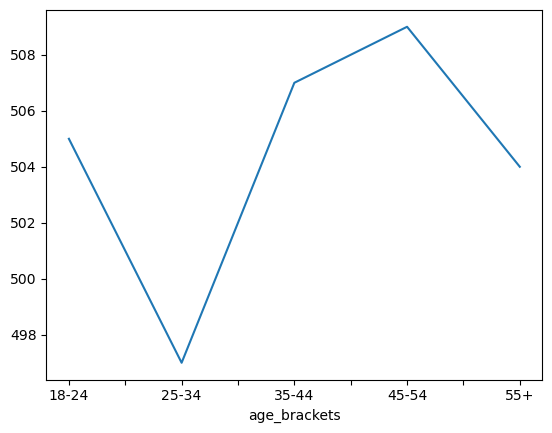

In [12]:
# create bins for the (18-24), (25-34), (35-44), (45-54) and (55+) categories
bins = [18, 25, 34, 44, 55, float('inf')]  
 
# labels for the three categories
labels = ['18-24', '25-34', '35-44', '45-54', '55+'] 
 
# bin it up!
df['age_brackets'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
 
# plot it!
df.groupby('age_brackets', observed=True)['donation_amount'].median().plot();

# Summary  

This tutorial focused on analyzing voter demographics and donation data to assist in election strategies. Using Pandas, various tasks were performed to uncover trends in voter donations across different states, age groups, and time periods.

### Key Takeaways:
- Learned how to merge two DataFrames (voter demographics and donations) on a common column (voter_id).
- Calculated total donations received by each state using the `.groupby()` and `.sum()` functions.
- Transformed the donation_date column from string to datetime format.
- Extracted month and year from the donation_date for further analysis.
- Visualized the median donation amounts per age bracket, discovering that the 45-54 age group contributed the most.

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>